In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
#from shapely.geometry import Point

# Load Data

In [3]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits'

In [4]:
perms= pd.read_csv(join(path_parks, '190618_ParksPermits_ADDCOLS.csv'), low_memory=False, index_col=0)

In [5]:
perms['start_date_time']= pd.to_datetime(perms['start_date_time'])
perms['end_date_time']= pd.to_datetime(perms['end_date_time'])

perms['year']= perms['start_date_time'].dt.year
perms['start_time']= perms['start_date_time'].dt.time
perms['end_time']= perms['end_date_time'].dt.time

perms['date']= perms['start_date_time'].dt.date
perms['dow']= perms['start_date_time'].dt.weekday

# Permit Data Sample

In [56]:
vancort= (perms['park_clean'].notna())&(perms['park_clean'].str.contains('van cort'))

In [57]:
fortwash= (perms['park_clean'].notna())&(perms['park_clean'].str.contains('fort wash'))

In [62]:
murray_mask= (perms['park_clean'].notna())&(perms['park_clean'].str.contains('murray'))&(perms['park_clean'].str.contains('playground'))

In [83]:
vannest= (perms['park_clean'].notna())&(perms['park_clean'].str.contains('van nest'))

In [104]:
jackie=  (perms['park_clean'].notna())&(perms['park_clean'].str.contains('jackie robinson park  b'))|(perms['park_clean'].str.contains('jackie robinson park b'))

In [105]:
rogermorris=  (perms['park_clean'].notna())&(perms['park_clean'].str.contains('roger morris'))|(perms['park_clean'].str.contains('morris jumel'))

In [106]:
perms['event_location']= perms['event_location'].fillna('0')

In [107]:
perms[rogermorris]['park_clean'].value_counts()

roger morris park m    111
Name: park_clean, dtype: int64

In [108]:
peryr= perms[rogermorris&(perms['year']>=2013)].groupby('year').agg({'park_clean':'count'}).reset_index().mean()
peryr

year          2017.0
park_clean      22.2
dtype: float64

In [110]:
perms[rogermorris&(perms['year']>=2013)].shape[0]

111

In [111]:
peryr[1]/1.524

14.566929133858267

In [112]:
perms[rogermorris]['event_name'].value_counts()

Tai Chi                                                                              17
Yoga at Morris Jumel Mansion                                                         14
The Importance of Being Earnest                                                       9
Party                                                                                 6
Miscellaneous                                                                         5
Celebration                                                                           5
Celebration                                                                           5
Chill on the Hill                                                                     4
African Dance                                                                         4
Picnic                                                                                3
Yoga                                                                                  3
Jazz Festival 2018              

In [45]:
perms[(perms['park_clean'].notna())&(perms['park_clean'].str.contains('fort washington'))].shape[0]/184.14

1.5748886716628654

In [113]:
perms.sample(10)

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,start_time,end_time,date,dow,event_clean,park_short,BOROUGH,park_clean,GISPROPNUM,TYPECATEGO
112879,"64,",2015-09-05 19:00:00,Parks Department,Manhattan,201308,Central Park: Cop Cot,Celebration,NaN,Special Event,"22,",...,17:00:00,19:00:00,2015-09-05,5,celebration,Central Park,M,central park m,M010,Flagship Park
208545,"64,",2018-11-24 15:00:00,Parks Department,Manhattan,447123,Central Park: Mineral Springs,Celebration,NaN,Special Event,"22,",...,13:00:00,15:00:00,2018-11-24,5,celebration,Central Park,M,central park m,M010,Flagship Park
211335,"64,",2019-01-16 23:59:00,Parks Department,Manhattan,444363,Central Park: Johnson Playground Lawns,Billy Johnson Playground Lawn Winter Closure...,NaN,Special Event,"22,",...,00:00:00,23:59:00,2019-01-16,2,billy johnson playground lawn winter closure...,Central Park,M,central park m,M010,Flagship Park
175605,"12,",2018-05-25 17:00:00,Parks Department,Queens,386993,"Dr. Charles R. (Drew Park): Baseball-01 ,Dr. C...",NY Masters Over 50 Softball Cricket Tournament...,NaN,Special Event,"113,",...,12:00:00,17:00:00,2018-05-25,4,ny masters over 50 softball cricket tournament...,Dr. Charles R.,Q,dr. charles r. q,NaN,NaN
111928,"12,",2017-07-17 16:00:00,Parks Department,Queens,346109,Rufus King Park: Rufus King Park,PAL PLAYSTREETS- Rufus King Park,NaN,Special Event,"103,",...,11:00:00,16:00:00,2017-07-17,0,pal playstreets- rufus king park,Rufus King Park,Q,rufus king park q,Q023,Neighborhood Park
206227,"9,",2018-10-06 09:00:00,Parks Department,Bronx,441253,Soundview Park: Soundview Park,NYRR Open Run - Soundview Park,NaN,Special Event,"43,",...,08:00:00,09:00:00,2018-10-06,5,nyrr open run - soundview park,Soundview Park,X,soundview park x,X118,Flagship Park
133849,"55,",2017-06-03 09:00:00,Parks Department,Brooklyn,326550,Prospect Park: Picnic House South,Fido Coffee Bark,NaN,Special Event,"78,",...,07:00:00,09:00:00,2017-06-03,5,fido coffee bark,Prospect Park,B,prospect park b,B073,Flagship Park
87684,"64,",2014-08-11 18:00:00,Parks Department,Manhattan,130445,Central Park: Lawn Outside Levin Playground (S...,Super Soccer Stars SUM CPE76,NaN,Special Event,"22,",...,09:00:00,18:00:00,2014-08-11,0,super soccer stars sum cpe76,Central Park,M,central park m,M010,Flagship Park
191674,"09, 9,",2018-07-23 21:00:00,Parks Department,Bronx,414481,Parque De Los Ninos: Parque De Los Ninos - Pla...,Watson Basketball Classic,NaN,Special Event,"43,",...,08:00:00,21:00:00,2018-07-23,0,watson basketball classic,Parque De Los Ninos,X,parque de los ninos x,NaN,NaN
227746,"7,",2019-07-07 21:00:00,Parks Department,Manhattan,448809,Riverside Park South: 70th Street Pier Plaza,Summer on the Hudson Amplified Sundays,NaN,Special Event,"20,",...,19:00:00,21:00:00,2019-07-07,6,summer on the hudson amplified sundays,Riverside Park South,M,riverside park south m,M353,Community Park


In [116]:
events= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\eventorg.csv",index_col=0)
#Dataframe with all events (descriptive categories, locations, and event organizers)

## Comparing the overlap of event_id's

In [173]:
pd.merge(events[events['event_id'].isin(perms['event_id'])],perms[perms['event_id'].isin(events['event_id'])],on='event_id',how='right')[['event_id','title','event_name_y']]

,event_id,title,event_name_y
0,76690,Open Hours: Hallett Nature Sanctuary,Celebration
1,149886,Paper Arts and Crafts,Barbecue
2,149886,Paper Arts and Crafts,Barbecue
3,149886,Paper Arts and Crafts,Barbecue
4,149886,Paper Arts and Crafts,Barbecue
5,95926,Zumba under the Stars with Lisa G aka RockaZum...,Weekend Volunteer Corps
6,95926,Zumba under the Stars with Lisa G aka RockaZum...,Weekend Volunteer Corps
7,95926,Zumba under the Stars with Lisa G aka RockaZum...,Weekend Volunteer Corps
8,161209,Goalball Hosted by the NY Knights,Barbecue
9,161209,Goalball Hosted by the NY Knights,Barbecue


In [175]:
events[events['event_id']==149886]

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,Location Name,park_id,lat,long,address,zip,borough,accessible,event_organizer,event_name
1,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center,Paper Arts and Crafts
2,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center,Paper Arts and Crafts
3,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center,Paper Arts and Crafts
4,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,Poe Visitor Center,Paper Arts and Crafts


In [176]:
perms[perms['event_id']==149886]

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,start_time,end_time,date,dow,event_clean,park_short,BOROUGH,park_clean,GISPROPNUM,TYPECATEGO
56428,"9,",2014-06-28 20:00:00,Parks Department,Manhattan,149886,Morningside Park: West 116th Picnic Area,Barbecue,NaN,Special Event,"26,",...,14:00:00,20:00:00,2014-06-28,5,barbecue,Morningside Park,M,morningside park m,M056,Community Park


In [146]:
events['event_name']= events['title']

In [169]:
pd.merge( events[ (events['event_name'].isin(perms['event_name'])) & (events.duplicated(['event_name','park_id'])) ],perms[ (perms['event_name'].isin(events['event_name'])) & (perms.duplicated(['event_name','park_clean']))],on='event_name',how='inner')[['event_id_x','event_id_y','event_name','park_clean','park_id']]

,event_id_x,event_id_y,event_name,park_clean,park_id
0,152959,163109,Birding,van cortlandt park x,Q461
1,152959,178935,Birding,van cortlandt park x,Q461
2,152959,121807,Birding,van cortlandt park x,Q461
3,152959,243852,Birding,van cortlandt park x,Q461
4,152959,146640,Birding,van cortlandt park x,Q461
5,152959,146626,Birding,pelham bay park and orchard beach x,Q461
6,152959,163109,Birding,van cortlandt park x,Q461
7,152959,178935,Birding,van cortlandt park x,Q461
8,152959,121807,Birding,van cortlandt park x,Q461
9,152959,243852,Birding,van cortlandt park x,Q461


# Initial Options

In [312]:
path_exp= r'M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\plt saves\190618 initial options'

## Total Permits and Events by Park Type, Log Min-Max Normalized

In [5]:
mask_1318= perms['year'].isin(np.arange(2013,2019,1))

In [6]:
y2y= perms[perms['year'].isin(np.arange(2013,2019,1))].groupby(['GISPROPNUM','year']).agg({'GISPROPNUM':'count'}).unstack()

In [7]:
y2y.columns= [2013, 2014, 2015, 2016, 2017, 2018]

In [8]:
y2y.fillna(0, inplace=True)

In [9]:
y2y['tp']= y2y[[2013, 2014, 2015, 2016, 2017, 2018]].sum(axis=1)

### Log Min-Max Normalize

In [10]:
tmax= y2y['tp'].max()
tmin= y2y['tp'].min()

In [11]:
y2y['tp_mm']= (y2y['tp'].apply(lambda x: (x-tmin)/(tmax-tmin))*100).round(0)
y2y['tp_lmm']= (y2y['tp'].apply(lambda x: (np.log(x)-np.log(tmin))/(np.log(tmax)-np.log(tmin)))*100).round(0)

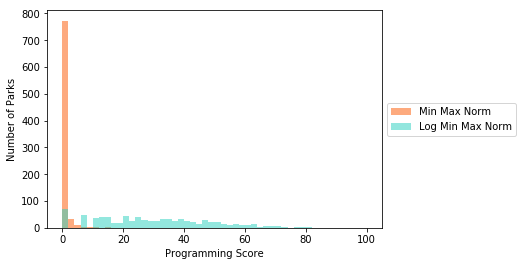

In [343]:
a= y2y['tp_mm'].values
b= y2y['tp_lmm'].values

bins= np.arange(0, 102, 2)

#plt.hist(aa, bins, alpha=0.5, label='All', color='#dfdfdf')
plt.hist(a, bins, alpha=0.5, label='Min Max Norm', color='#FD5700')
plt.hist(b, bins, alpha=0.5, label='Log Min Max Norm', color='#29D0BF')
#plt.hist(a, bins, alpha=0.5, label='Not Reported', color='#9355B0')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.savefig(join(path_exp, 'Total Events_MM_LMM.pdf'))

plt.show();

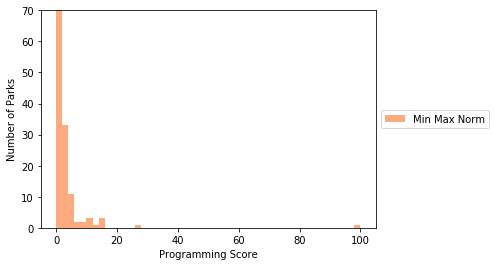

In [346]:
a= y2y['tp_mm'].values
b= y2y['tp_lmm'].values

bins= np.arange(0, 102, 2)

#plt.hist(aa, bins, alpha=0.5, label='All', color='#dfdfdf')
plt.hist(a, bins, alpha=0.5, label='Min Max Norm', color='#FD5700')
#plt.hist(b, bins, alpha=0.5, label='Log Min Max Norm', color='#29D0BF')
#plt.hist(a, bins, alpha=0.5, label='Not Reported', color='#9355B0')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.ylim((0,70))

plt.savefig(join(path_exp, 'Total Events_MM.pdf'))

plt.show();

In [13]:
y2y.reset_index(inplace=True)

In [14]:
y2y

,GISPROPNUM,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm
0,B001,2.0,2.0,3.0,4.0,3.0,6.0,20.0,0.0,28.0
1,B002,5.0,16.0,16.0,19.0,14.0,15.0,85.0,0.0,42.0
2,B006,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,B007,8.0,15.0,21.0,21.0,14.0,20.0,99.0,0.0,44.0
4,B008,17.0,37.0,18.0,25.0,29.0,27.0,153.0,0.0,48.0
5,B016,63.0,84.0,88.0,81.0,43.0,52.0,411.0,1.0,57.0
6,B018,105.0,138.0,153.0,199.0,281.0,312.0,1188.0,3.0,67.0
7,B019,81.0,54.0,75.0,111.0,112.0,108.0,541.0,1.0,60.0
8,B021,57.0,95.0,133.0,123.0,42.0,93.0,543.0,1.0,60.0
9,B022,1.0,6.0,5.0,5.0,0.0,4.0,21.0,0.0,29.0


### Evaluate by Park Type

In [15]:
uparks= perms[~perms[['GISPROPNUM', 'TYPECATEGO']].duplicated()][['GISPROPNUM', 'TYPECATEGO']].reset_index(drop=True)

In [16]:
y2y= pd.merge(uparks, y2y, on='GISPROPNUM', how='right')

In [17]:
park_types= y2y['TYPECATEGO'].unique()

In [18]:
fordf= []

for p in park_types:
    v= y2y[y2y['TYPECATEGO']==p]['tp'].values
    fordf.append([p, v.max(), v.min()])

In [31]:
minmaxes= pd.DataFrame(np.array(fordf), columns=['TYPECATEGO', 'MAX', 'MIN']).set_index('TYPECATEGO')

In [33]:
for n, s in minmaxes.iteritems():
    minmaxes[n]= s.astype(np.float32)

In [34]:
minmaxes['DELTA']= minmaxes['MAX']-minmaxes['MIN']

In [251]:
minmaxes

,MAX,MIN,DELTA
TYPECATEGO,,,
Neighborhood Park,5705.0,1.0,5704.0
Community Park,5412.0,1.0,5411.0
Flagship Park,38611.0,365.0,38246.0
Waterfront Facility,2588.0,1.0,2587.0
Recreation Field/Courts,1916.0,1.0,1915.0
Playground,434.0,1.0,433.0
Nature Area,862.0,1.0,861.0
Triangle/Plaza,1091.0,1.0,1090.0
Jointly Operated Playground,387.0,1.0,386.0


In [138]:
def park_type_adjusted(x, pt, lookup):
    try:
        mi= np.log(lookup.loc[pt, 'MIN'])
        mx= np.log(lookup.loc[pt, 'MAX'])
        dt= mx-mi
        return round((np.log(x)-mi)/dt*100, 0)
    except KeyError:
        return np.nan

In [54]:
y2y['tp_palmm']= [park_type_adjusted(x, pt, minmaxes) for x, pt in y2y[['tp', 'TYPECATEGO']].itertuples(index=False)]

In [55]:
y2y['tp_palmm'].max()

100.0

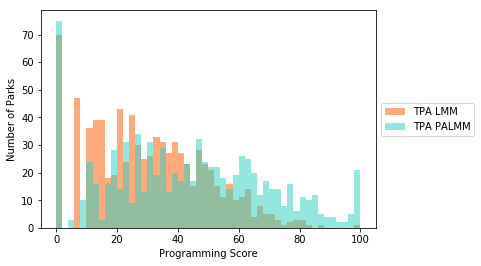

In [347]:
bins= np.arange(0, 102, 2)

tp_lmm= y2y['tp_lmm'].values
tp_palmm= y2y['tp_palmm'].values

plt.hist(tp_lmm, bins, alpha=0.5, label='TPA LMM', color=three_colors[0])
plt.hist(tp_palmm, bins, alpha=0.5, label='TPA PALMM', color=three_colors[1])

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

#plt.savefig(join(path_exp, 'Total Events_Park Type or Not_LMM.pdf'))

plt.show();

In [58]:
y2y['TYPECATEGO'].value_counts()

Neighborhood Park              203
Playground                     171
Jointly Operated Playground    148
Triangle/Plaza                 107
Community Park                  81
Recreation Field/Courts         42
Nature Area                     15
Flagship Park                   14
Parkway                         10
Waterfront Facility              9
Mall                             6
Undeveloped                      5
Buildings/Institutions           5
Tracking                         5
Historic House Park              4
Cemetery                         3
Managed Sites                    2
Name: TYPECATEGO, dtype: int64

In [64]:
three_colors= ['#FD5700', '#29D0BF', '#9355B0']

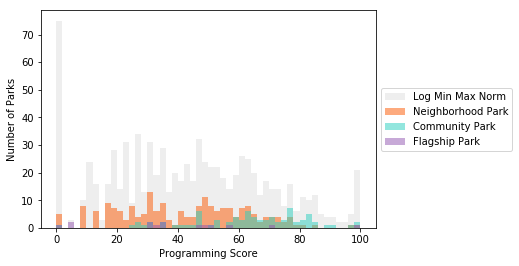

In [336]:
bins= np.arange(0, 102, 2)

plt.hist(y2y['tp_palmm'].values, bins, alpha=0.5, label='Log Min Max Norm', color='#dfdfdf')

for pt, c in zip(['Neighborhood Park', 'Community Park', 'Flagship Park'], three_colors):
    scores= y2y[y2y['TYPECATEGO']==pt]['tp_palmm'].values
    plt.hist(scores, bins, alpha=0.5, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_Park Type 1_LMM.pdf'))

plt.show();

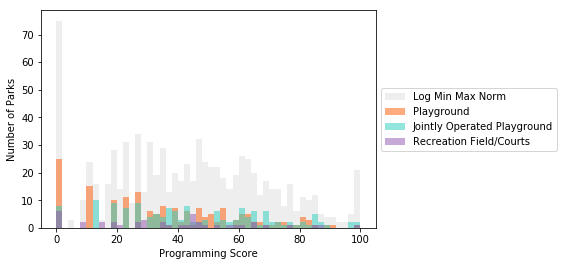

In [337]:
bins= np.arange(0, 102, 2)

plt.hist(y2y['tp_palmm'].values, bins, alpha=0.5, label='Log Min Max Norm', color='#dfdfdf')

for pt, c in zip(['Playground', 'Jointly Operated Playground', 'Recreation Field/Courts'], three_colors):
    scores= y2y[y2y['TYPECATEGO']==pt]['tp_palmm'].values
    plt.hist(scores, bins, alpha=0.5, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events_Park Type 2_LMM.pdf'))

plt.show();

## Total Permits and Events per Acre by Park Type, Log Min-Max Normalized

In [74]:
parks= gpd.read_file(r"S:\NYC_GIS_DATA\NYC_PARKS_DATA\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [148]:
y2y= pd.merge(parks[['GISPROPNUM', 'ACRES']], y2y,  on='GISPROPNUM', how='right')

In [149]:
no0= y2y[y2y['ACRES']!=0].copy()

In [150]:
no0['tpa']= no0['tp']/no0['ACRES']

In [155]:
no0['tpa'].min()

0.00503826562744041

### Log Min-Max Normalize

In [158]:
tmax= no0['tpa'].max()
tmin= no0['tpa'].min()

no0['tpa_mm']= no0['tpa'].apply(lambda x: (x-tmin)/(tmax-tmin))*100
no0['tpa_lmm']= no0['tpa'].apply(lambda x: (np.log(x)-np.log(tmin))/(np.log(tmax)-np.log(tmin)))*100

In [159]:
no0

,GISPROPNUM,ACRES,ACRES_x,ACRES_y,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tpa,tpa_mm,tpa_lmm
0,Q104,20.340,20.340,20.340,Community Park,63.0,76.0,61.0,51.0,65.0,88.0,404.0,1.0,57.0,70.0,19.862340,0.033096,50.817062
1,X253,6.100,6.100,6.100,Recreation Field/Courts,1.0,3.0,1.0,1.0,3.0,5.0,14.0,0.0,25.0,35.0,2.295082,0.003817,37.571593
2,Q465,6.280,6.280,6.280,Neighborhood Park,23.0,32.0,21.0,45.0,14.0,26.0,161.0,0.0,48.0,59.0,25.636943,0.042720,52.383454
3,B379,8.892,8.892,8.892,Nature Area,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.112461,0.000179,19.060829
4,B385,6.611,6.611,6.611,Neighborhood Park,31.0,132.0,54.0,27.0,27.0,26.0,297.0,1.0,54.0,66.0,44.925125,0.074867,55.826466
5,B129,26.257,26.257,26.257,Community Park,69.0,142.0,162.0,151.0,172.0,110.0,806.0,2.0,63.0,78.0,30.696576,0.051153,53.488953
6,B126,58.503,58.503,58.503,Community Park,52.0,109.0,92.0,31.0,24.0,49.0,357.0,1.0,56.0,68.0,6.102251,0.010162,43.573567
7,R008,4.339,4.339,4.339,Community Park,7.0,4.0,12.0,11.0,5.0,17.0,56.0,0.0,38.0,47.0,12.906200,0.021502,48.170998
8,Q371,255.400,255.400,255.400,Community Park,1.0,0.0,3.0,2.0,2.0,1.0,9.0,0.0,21.0,26.0,0.035239,0.000050,11.938327
9,R079,104.545,104.545,104.545,Waterfront Facility,0.0,2.0,5.0,7.0,2.0,9.0,25.0,0.0,30.0,41.0,0.239131,0.000390,23.691159


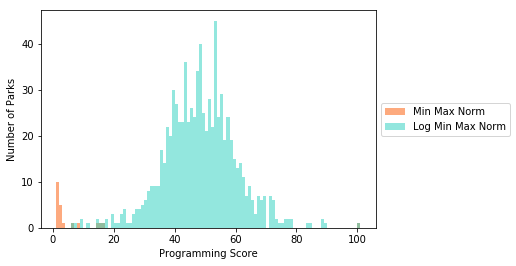

In [338]:
a= no0['tpa_mm'].values
b= no0['tpa_lmm'].values

bins= np.arange(1, 102, 1)

plt.hist(a, bins, alpha=0.5, label='Min Max Norm', color='#FD5700')
plt.hist(b, bins, alpha=0.5, label='Log Min Max Norm', color='#29D0BF')

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Acre_MM_LMM.pdf'))

plt.show();

### Evaluate by Park Type

In [161]:
park_types

array(['Neighborhood Park', 'Community Park', 'Flagship Park',
       'Waterfront Facility', 'Recreation Field/Courts', 'Playground',
       'Nature Area', 'Triangle/Plaza', 'Jointly Operated Playground',
       'Mall', 'Tracking', 'Managed Sites', 'Historic House Park',
       'Parkway', 'Buildings/Institutions', 'Cemetery', 'Undeveloped'],
      dtype=object)

In [162]:
fordf2= []

for p in park_types:
    v= no0[no0['TYPECATEGO']==p]['tpa'].values
    if len(v)>0:
        fordf2.append([p, v.max(), v.min()])

minmaxes2= pd.DataFrame(np.array(fordf2), columns=['TYPECATEGO', 'MAX', 'MIN']).set_index('TYPECATEGO')

In [163]:
minmaxes2

,MAX,MIN
TYPECATEGO,,
Neighborhood Park,725.9713701431493,0.023191094619666047
Community Park,588.9400921658986,0.03523884103367267
Flagship Park,45.964928988940606,0.13168590062512922
Waterfront Facility,82.13073005093379,0.19138755980861244
Recreation Field/Courts,180.2325581395349,0.3729752770673487
Playground,377.02265372168284,0.25641025641025644
Nature Area,4.010290908921734,0.024807432306719095
Triangle/Plaza,60000.0,0.07014098337658695
Jointly Operated Playground,595.9183673469388,0.3941663381947182


In [164]:
no0.loc[no0['tpa'].sort_values(ascending=False).head(10).index]

,GISPROPNUM,ACRES,ACRES_x,ACRES_y,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tpa,tpa_mm,tpa_lmm
627,B094,0.001,0.001,0.001,Triangle/Plaza,22.0,0.0,15.0,2.0,4.0,17.0,60.0,0.0,39.0,59.0,60000.000000,100.000000,100.000000
656,Q058,0.003,0.003,0.003,Triangle/Plaza,1.0,2.0,1.0,2.0,2.0,22.0,30.0,0.0,32.0,49.0,10000.000000,16.666660,89.002748
471,M093,0.076,0.076,0.076,Triangle/Plaza,99.0,96.0,96.0,96.0,150.0,188.0,725.0,2.0,62.0,94.0,9539.473684,15.899116,88.713376
598,M040,0.018,0.018,0.018,Triangle/Plaza,1.0,22.0,22.0,20.0,45.0,47.0,157.0,0.0,48.0,72.0,8722.222222,14.537030,88.163659
531,M188A,0.014,0.014,0.014,Triangle/Plaza,10.0,12.0,12.0,10.0,14.0,10.0,68.0,0.0,40.0,60.0,4857.142857,8.095230,84.570514
101,M032,0.144,0.144,0.144,Triangle/Plaza,60.0,124.0,122.0,111.0,48.0,111.0,576.0,1.0,60.0,91.0,4000.000000,6.666659,83.378846
591,Q462,0.040,0.040,0.040,Triangle/Plaza,7.0,22.0,16.0,11.0,10.0,8.0,74.0,0.0,41.0,62.0,1850.000000,3.083325,78.646025
660,Q172,0.041,0.041,0.041,Triangle/Plaza,13.0,21.0,27.0,10.0,0.0,0.0,71.0,0.0,40.0,61.0,1731.707317,2.886171,78.240461
657,Q075,0.005,0.005,0.005,Triangle/Plaza,2.0,2.0,1.0,2.0,1.0,0.0,8.0,0.0,20.0,30.0,1600.000000,2.666658,77.754944
62,M101,0.269,0.269,0.269,Triangle/Plaza,73.0,36.0,73.0,69.0,41.0,102.0,394.0,1.0,57.0,85.0,1464.684015,2.441132,77.212593


In [165]:
for n, s in minmaxes2.iteritems():
    minmaxes2[n]= s.astype(np.float32)

In [167]:
no0['tpa_palmm']= [park_type_adjusted(x, pt, minmaxes2) for x, pt in no0[['tpa', 'TYPECATEGO']].itertuples(index=False)]

In [173]:
no0['tpa_palmm']= no0['tpa_palmm'].abs()

In [202]:
tpa_palmm= no0['tpa_palmm'].values

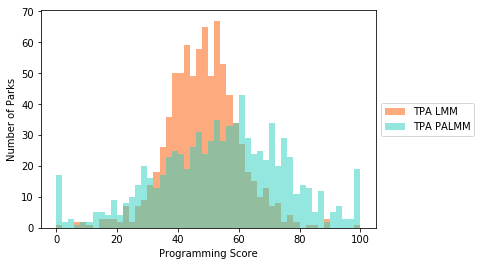

In [339]:
bins= np.arange(0, 102, 2)

tpa_lmm= no0['tpa_lmm'].values
tpa_palmm= no0['tpa_palmm'].values

plt.hist(tpa_lmm, bins, alpha=0.5, label='TPA LMM', color=three_colors[0])
plt.hist(tpa_palmm, bins, alpha=0.5, label='TPA PALMM', color=three_colors[1])

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type or Not_LMM.pdf'))

plt.show();

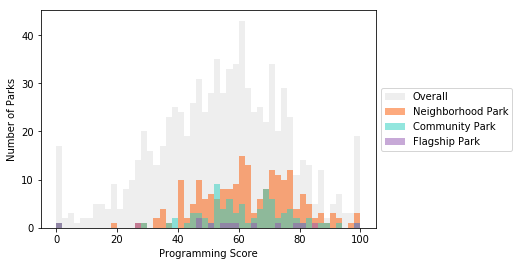

In [340]:
bins= np.arange(0, 102, 2)

plt.hist(tpa_palmm, bins, alpha=0.5, label='Overall', color='#dfdfdf')

for pt, c in zip(['Neighborhood Park', 'Community Park', 'Flagship Park'], three_colors):
    scores= no0[no0['TYPECATEGO']==pt]['tpa_palmm'].values
    plt.hist(scores, bins, alpha=0.5, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type 1_LMM.pdf'))

plt.show();

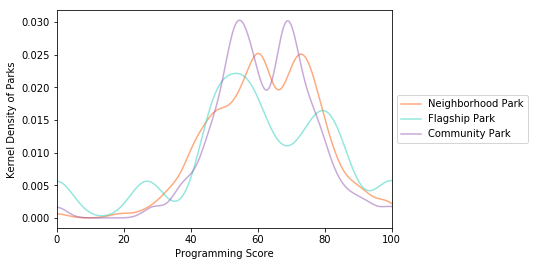

In [330]:
fig, ax= plt.subplots()

for pt, c in zip(['Neighborhood Park', 'Flagship Park', 'Community Park'], three_colors):
    no0[no0['TYPECATEGO']==pt]['tpa_palmm'].reset_index(drop=True)\
        .plot.kde(ax=ax, alpha=0.5, label=pt, color=c, bw_method=0.2)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Kernel Density of Parks')
plt.xlim((0,100))

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type 1_LMM_KDE.pdf'))

plt.show();

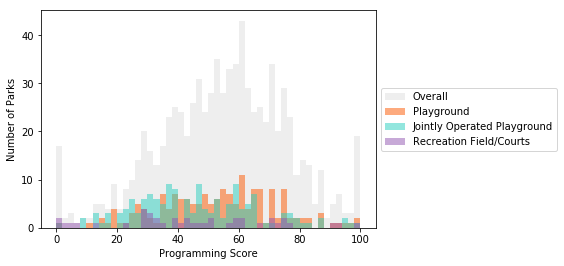

In [341]:
bins= np.arange(0, 102, 2)

plt.hist(tpa_palmm, bins, alpha=0.5, label='Overall', color='#dfdfdf')

for pt, c in zip(['Playground', 'Jointly Operated Playground', 'Recreation Field/Courts'], three_colors):
    scores= no0[no0['TYPECATEGO']==pt]['tpa_palmm'].values
    plt.hist(scores, bins, alpha=0.5, label=pt, color=c)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Number of Parks')

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type 2_LMM.pdf'))

plt.show();

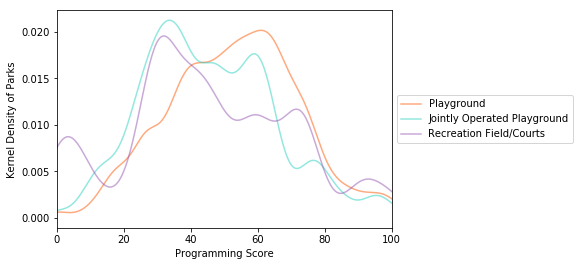

In [331]:
fig, ax= plt.subplots()

for pt, c in zip(['Playground', 'Jointly Operated Playground', 'Recreation Field/Courts'], three_colors):
    no0[no0['TYPECATEGO']==pt]['tpa_palmm'].reset_index(drop=True)\
        .plot.kde(ax=ax, alpha=0.5, label=pt, color=c, bw_method=0.2)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Kernel Density of Parks')
plt.xlim((0,100))

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type 2_LMM_KDE.pdf'))

plt.show();

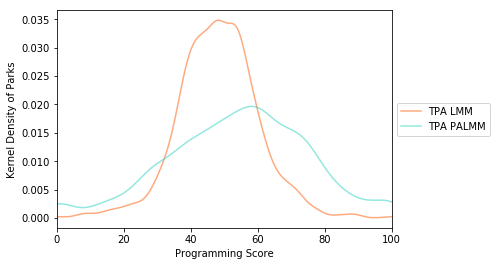

In [333]:
fig, ax= plt.subplots()

no0['tpa_lmm'].reset_index(drop=True).plot.kde(ax=ax, alpha=0.5, label='TPA LMM', color=three_colors[0], bw_method=0.2)
no0['tpa_palmm'].reset_index(drop=True).plot.kde(ax=ax, alpha=0.5, label='TPA PALMM', color=three_colors[1], bw_method=0.2)

plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.xlabel('Programming Score')
plt.ylabel('Kernel Density of Parks')
plt.xlim((0,100))

plt.savefig(join(path_exp, 'Total Events by Acre_Park Type or Not_LMM_KDE.pdf'))

plt.show();

In [206]:
no0

,GISPROPNUM,ACRES,ACRES_x,ACRES_y,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tpa,tpa_mm,tpa_lmm,tpa_palmm
0,Q104,20.340,20.340,20.340,Community Park,63.0,76.0,61.0,51.0,65.0,88.0,404.0,1.0,57.0,70.0,19.862340,0.033096,50.817062,65.0
1,X253,6.100,6.100,6.100,Recreation Field/Courts,1.0,3.0,1.0,1.0,3.0,5.0,14.0,0.0,25.0,35.0,2.295082,0.003817,37.571593,29.0
2,Q465,6.280,6.280,6.280,Neighborhood Park,23.0,32.0,21.0,45.0,14.0,26.0,161.0,0.0,48.0,59.0,25.636943,0.042720,52.383454,68.0
3,B379,8.892,8.892,8.892,Nature Area,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.112461,0.000179,19.060829,30.0
4,B385,6.611,6.611,6.611,Neighborhood Park,31.0,132.0,54.0,27.0,27.0,26.0,297.0,1.0,54.0,66.0,44.925125,0.074867,55.826466,73.0
5,B129,26.257,26.257,26.257,Community Park,69.0,142.0,162.0,151.0,172.0,110.0,806.0,2.0,63.0,78.0,30.696576,0.051153,53.488953,70.0
6,B126,58.503,58.503,58.503,Community Park,52.0,109.0,92.0,31.0,24.0,49.0,357.0,1.0,56.0,68.0,6.102251,0.010162,43.573567,53.0
7,R008,4.339,4.339,4.339,Community Park,7.0,4.0,12.0,11.0,5.0,17.0,56.0,0.0,38.0,47.0,12.906200,0.021502,48.170998,61.0
8,Q371,255.400,255.400,255.400,Community Park,1.0,0.0,3.0,2.0,2.0,1.0,9.0,0.0,21.0,26.0,0.035239,0.000050,11.938327,0.0
9,R079,104.545,104.545,104.545,Waterfront Facility,0.0,2.0,5.0,7.0,2.0,9.0,25.0,0.0,30.0,41.0,0.239131,0.000390,23.691159,4.0


# ABCDF Scoring

## Prepare Lookup Table

In [245]:
scoring= \
pd.read_html(r'https://www.mooxye.com/blog/en/american-grading-system-and-gpa/', skiprows=1)[0]\
    .rename(columns={0:'Grade Range', 1:'Grade', 2:'GPA'})

In [246]:
scoring['Lower']= pd.to_numeric(scoring['Grade Range'].str.split('-| ').apply(lambda x: x[0]), errors='coerce')
scoring['Upper']= pd.to_numeric(scoring['Grade Range'].str.split('-| ').apply(lambda x: x[1]), errors='coerce')

In [247]:
scoring.at[11,'Lower']= 0

In [269]:
scoring= scoring[::-1].reset_index(drop=True)

In [270]:
scoring

,Grade Range,Grade,GPA,Lower,Upper
0,Below 60,F,0.0,0.0,60
1,60-62,D-,0.7,60.0,62
2,63-66,D,1.0,63.0,66
3,67-69,D+,1.3,67.0,69
4,70-72,C-,1.7,70.0,72
5,73-76,C,2.0,73.0,76
6,77-79,C+,2.3,77.0,79
7,80-82,B-,2.7,80.0,82
8,83-86,B,3.0,83.0,86
9,87-89,B+,3.3,87.0,89


## Score Initial Options

In [253]:
no0.head(2)

,GISPROPNUM,ACRES,ACRES_x,ACRES_y,TYPECATEGO,2013,2014,2015,2016,2017,2018,tp,tp_mm,tp_lmm,tp_palmm,tpa,tpa_mm,tpa_lmm,tpa_palmm
0,Q104,20.34,20.34,20.34,Community Park,63.0,76.0,61.0,51.0,65.0,88.0,404.0,1.0,57.0,70.0,19.862340,0.033096,50.817062,65.0
1,X253,6.10,6.10,6.10,Recreation Field/Courts,1.0,3.0,1.0,1.0,3.0,5.0,14.0,0.0,25.0,35.0,2.295082,0.003817,37.571593,29.0


In [254]:
no0[['tp_palmm', 'tpa_palmm']].corr()

,tp_palmm,tpa_palmm
tp_palmm,1.000000,0.705842
tpa_palmm,0.705842,1.000000


In [265]:
no0['tp_palmm']

0       70.0
1       35.0
2       59.0
3        0.0
4       66.0
5       78.0
6       68.0
7       47.0
8       26.0
9       41.0
10      59.0
11      42.0
12     100.0
13      75.0
14      -0.0
15      41.0
16      50.0
17      51.0
18      84.0
19      64.0
20      71.0
21      92.0
22      26.0
23      77.0
24      61.0
25      62.0
26      74.0
27      61.0
28      49.0
29      74.0
       ...  
799     40.0
801     84.0
802      0.0
803     21.0
804     57.0
805     27.0
806     -0.0
807     64.0
808     31.0
809     81.0
810     79.0
811     35.0
812      0.0
813     22.0
814     41.0
815     28.0
816      0.0
817     53.0
818     49.0
819     77.0
820     87.0
821      5.0
822     46.0
823     43.0
824     21.0
825     37.0
826      8.0
827      0.0
828    100.0
829     71.0
Name: tp_palmm, Length: 825, dtype: float64

In [257]:
scoring['Upper'].values

array([100,  92,  89,  86,  82,  79,  76,  72,  69,  66,  62,  60],
      dtype=int64)

In [286]:
no0['tp_grade']= \
pd.cut(no0['tp_palmm'],
       bins=np.insert(scoring['Upper'].values, 0, -1),
       include_lowest=False, labels=scoring['Grade'].values)
no0['tp_grade']= no0['tp_grade'].astype(str)

no0['tpa_grade']= \
pd.cut(no0['tpa_palmm'],
       bins=np.insert(scoring['Upper'].values, 0, -1),
       include_lowest=False, labels=scoring['Grade'].values)
no0['tpa_grade']= no0['tpa_grade'].astype(str)

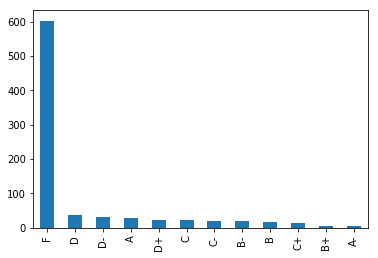

In [287]:
no0['tp_grade'].value_counts().plot.bar();

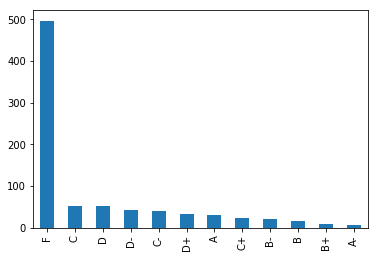

In [288]:
no0['tpa_grade'].value_counts().plot.bar();

# Export

In [291]:
path_options= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Initial Options'

In [292]:
y2y.to_csv(join(path_options, '190618_TParks.csv'))
no0.to_csv(join(path_options, '190618_TParks by Acre.csv'))

In [296]:
y2y_gdf= pd.merge(parks[['GISPROPNUM', 'geometry']], y2y, on='GISPROPNUM', how='right')
no0_gdf= pd.merge(parks[['GISPROPNUM', 'geometry']], no0, on='GISPROPNUM', how='right')

In [301]:
y2y_gdf['geometry']= y2y_gdf.centroid
no0_gdf['geometry']= no0_gdf.centroid

In [309]:
y2y_gdf.columns= ['GISPROPNUM','geometry','ACRES','ACRES_x','ACRES_y','TYPECATEGO',
                  'y2013','y2014','y2015','y2016','y2017','y2018','tp','tp_mm','tp_lmm','tp_palmm']
no0_gdf.columns= ['GISPROPNUM','geometry','ACRES','ACRES_x','ACRES_y','TYPECATEGO',
                  'y2013','y2014','y2015','y2016','y2017','y2018','tp','tp_mm','tp_lmm','tp_palmm',
                  'tpa','tpa_mm','tpa_lmm','tpa_palmm','tp_grade','tpa_grade']

In [310]:
y2y_gdf.drop(['ACRES_x','ACRES_y'], axis=1, inplace=True)
no0_gdf.drop(['ACRES_x','ACRES_y'], axis=1, inplace=True)

In [311]:
y2y_gdf.to_file(join(path_options, '190618_TParks.shp'))
no0_gdf.to_file(join(path_options, '190618_TParks by Acre.shp'))